In [2]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True


In [3]:
import torchvision.datasets

In [4]:
MNIST_train = torchvision.datasets.MNIST('./', download = True, train = True)
MNIST_test = torchvision.datasets.MNIST('./', download = True, train = False)

In [5]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

In [6]:
len(y_train), len(y_test)

(60000, 10000)

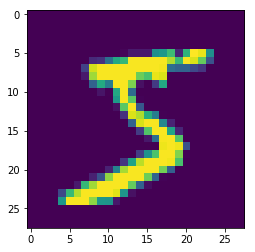

tensor(5)


In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [69]:
X_train.shape

torch.Size([60000, 28, 28])

In [70]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [71]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [72]:
X_test[0].shape

torch.Size([1, 28, 28])

In [73]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=8, kernel_size=5, padding=2)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=8, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 200)
        self.act3  = torch.nn.ReLU()
        
        self.fc2   = torch.nn.Linear(200, 100)
        self.act4  = torch.nn.ReLU()
        
        self.fc3   = torch.nn.Linear(100, 84)
        self.act5  = torch.nn.ReLU()
        
        self.fc4   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        x = self.act5(x)
        x = self.fc4(x)
        
        return x
    
lenet5 = LeNet5()
print(lenet5)

LeNet5(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (act1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (act2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=200, bias=True)
  (act3): ReLU()
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (act4): ReLU()
  (fc3): Linear(in_features=100, out_features=84, bias=True)
  (act5): ReLU()
  (fc4): Linear(in_features=84, out_features=10, bias=True)
)


In [75]:
params = list(lenet5.parameters())
print(len(params))
print(params[0].size())

12
torch.Size([8, 1, 5, 5])


In [76]:
device = torch.device('cuda:0')
lenet5 = lenet5.to(device)


In [77]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=3*10e-4, betas=(0.9, 0.999))

In [11]:
print(X_train[0])

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [79]:
batch_size = 800

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(300):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch)
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(epoch + 1)
    print(accuracy)
    

1
tensor(0.9736)
2
tensor(0.9810)
3
tensor(0.9834)
4
tensor(0.9850)
5
tensor(0.9893)
6
tensor(0.9866)
7
tensor(0.9856)
8
tensor(0.9884)
9
tensor(0.9880)
10
tensor(0.9883)


KeyboardInterrupt: 

In [80]:
for i in range(20):
    input = X_test[i].unsqueeze(1).float()

    out = lenet5(input).tolist()
    out2 = out[0]
    #print(out2)
    a = 0
    digit=0
    for key in range(len(out2)):
        if (out2[key] > a):
            digit = key
            a = out2[key]
    print(digit)
    print(y_test[i])

7
tensor(7, device='cuda:0')
2
tensor(2, device='cuda:0')
1
tensor(1, device='cuda:0')
0
tensor(0, device='cuda:0')
4
tensor(4, device='cuda:0')
1
tensor(1, device='cuda:0')
4
tensor(4, device='cuda:0')
9
tensor(9, device='cuda:0')
5
tensor(5, device='cuda:0')
9
tensor(9, device='cuda:0')
0
tensor(0, device='cuda:0')
6
tensor(6, device='cuda:0')
9
tensor(9, device='cuda:0')
0
tensor(0, device='cuda:0')
1
tensor(1, device='cuda:0')
5
tensor(5, device='cuda:0')
9
tensor(9, device='cuda:0')
7
tensor(7, device='cuda:0')
3
tensor(3, device='cuda:0')
4
tensor(4, device='cuda:0')


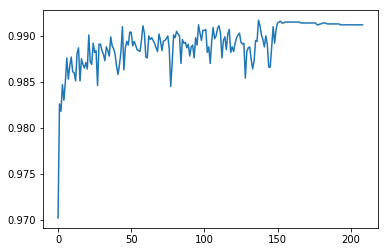

In [80]:
plt.plot(test_accuracy_history)
#plt.plot(test_loss_history)